In [ ]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

Mounted at /content/gdrive


In [ ]:
#Importing necessary libraries
#my_utils taken from NNDL course and included in zip folder
import my_utils as mu
import torch
from torch import nn
from IPython import display
import math
import torchvision


Load Data

In [ ]:
#Loading the dataset using dataloader found in my utils - taken from NNDL course
# materials
batch_size = 256
train_iter, test_iter = mu.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Creating Patches (https://discuss.pytorch.org/t/fold-unfold-to-get-patches/53419/6)

In [ ]:
#Building the model - adapted from NNDL course materials
class Net(torch.nn.Module):

    def __init__(self, num_inputs, num_outputs, num_patches, hidden_layer):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_patches = num_patches
        
        #Preprocessing transormations initialized, code adapted from
        #https://stackoverflow.com/questions/63552044/how-to-extract-feature-
        #vector-from-single-image-in-pytorch

        #https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-
        #7f6ad71e96f4
        self.transforms = torch.nn.Sequential(
            torchvision.transforms.Normalize((0.5,), (0.5,),),
            torchvision.transforms.ColorJitter()
        )
        
        #Linear layers initialised using default He initialization

        self.Linear1 = nn.Linear(num_inputs, 256)
        self.Linear2 = nn.Linear(256, 128)
        
        self.Linear3 = nn.Linear(128, 64)
        self.Linear4 = nn.Linear(64, 32)
        self.Linear5 = nn.Linear(num_patches, 256)
        self.Linear6 = nn.Linear(256, 128)
        
        self.Linear7 = nn.Linear(128, 64)
        self.Linear8 = nn.Linear(64, 32)
        self.Linear9 = nn.Linear(32, 16)
        self.Linear10 = nn.Linear(16, 128)

        self.Linear11 = nn.Linear(128, 64)
        self.Linear12 = nn.Linear(64, 32)
        self.Linear13 = nn.Linear(32, 256)
        self.Linear14 = nn.Linear(256, 128)
        
        self.Linear15 = nn.Linear(128, 64)
        self.Linear16 = nn.Linear(64, 32)
        self.Linear17 = nn.Linear(32, 16)
        self.Linear18 = nn.Linear(16, num_outputs)

        #Activation and dropout layers initialised
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        

    def forward(self, x):

        x_t = self.transforms(x)

        #Stem
        #Patches created using code adapted from: 
        #https://discuss.pytorch.org/t/fold-unfold-to-get-patches/53419/6
        kh, kw = int(math.sqrt(num_inputs)), int(math.sqrt(num_inputs)) # kernel
        dh, dw = int(math.sqrt(num_inputs)), int(math.sqrt(num_inputs)) # stride
        patches = x_t.unfold(2, kh, dh).unfold(3, kw, dw)
        feature_vectors = torch.flatten(patches, start_dim=1, end_dim=3)
        feature_vectors = torch.flatten(feature_vectors, start_dim=2)
        #print(feature_vectors.shape)
        out = self.Linear1(feature_vectors)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear2(out)

        #print(out.shape)

        #Activation
        out = self.relu(out)
        out = self.dropout(out)
        
        #Block 1
        #print(out.shape)
        out = self.Linear3(out)
        #print(out.shape)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear4(out)
        out = torch.transpose(out, 1, 2)
        #out = self.dropout(out)
        #print(out.shape)
        out = self.Linear5(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear6(out)

        #Activation
        out = self.relu(out)
        out = self.dropout(out)

        #Block 2
        #print(out.shape)
        out = self.Linear7(out)
        #print(out.shape)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear8(out)
        out = torch.transpose(out, 1, 2)
        #out = self.dropout(out)
        #print(out.shape)
        out = self.Linear9(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear10(out)

        #Activation
        out = self.relu(out)

        #Block 3
        #print(out.shape)
        out = self.Linear11(out)
        #print(out.shape)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear12(out)
        out = torch.transpose(out, 1, 2)
        #out = self.dropout(out)
        #print(out.shape)
        out = self.Linear13(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear14(out)

        #Activation
        out = self.relu(out)

        #Block 4
        #print(out.shape)
        out = self.Linear15(out)
        #print(out.shape)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear16(out)
        out = torch.transpose(out, 1, 2)
        #out = self.dropout(out)
        #print(out.shape)
        out = self.Linear17(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.Linear18(out)



        out = torch.mean(out, 2)
        #print(out.shape)

        return out


num_patches = 4
num_inputs, num_outputs = int(28*28/num_patches), 10
hidden_layer = int(num_inputs//2)
net = Net(num_inputs, num_outputs, num_patches, hidden_layer)





In [ ]:
#Loss function taken from NNDL course materials
loss = nn.CrossEntropyLoss()

In [ ]:
#Optimizer function - taken from NNDL course materials
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
#Scheduler to reduce learning rate on plateau
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', 
                                                        patience=2, 
                                                        threshold=0.001)



In [ ]:
# Accuracy Function - taken from NNDL course materials

def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score         
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp)) # Taking the sum yields the number of correct predictions.

In [ ]:
# Accumulator Function - taken from NNDL course materials

class Accumulator:  
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]


In [ ]:
# Evaluate Accuracy Function - taken from NNDL course materials

def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
#Training function for 1 epoch - taken from NNDL course materials
def train_epoch_ch3(net, train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    """The training function for one epoch."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]



In [ ]:
class Animator:  
        """For plotting data in animation. - taken from NNDL course materials"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
#Training Script - adapted from NNDL course materials
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer):  
    """Train a model."""
    animator = Animator(xlabel='epoch', xlim=[1, (num_epochs)], ylim=[0, 1],
                        legend=['train loss', 'train acc', 'test acc'])
    animator1 = Animator(xlabel='epoch', xlim=[1, (num_epochs)], ylim=[0.8, 0.95],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net.eval(), test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        animator1.add(epoch + 1, train_metrics + (test_acc,))
        scheduler.step(train_metrics[0])

    train_loss, train_acc = train_metrics
    #assert train_loss < 0.5, train_loss
    print(train_loss)
    #assert train_acc <= 1 and train_acc > 0.7, train_acc
    print(train_acc)
    #assert test_acc <= 1 and test_acc > 0.7, test_acc
    print(test_acc)

0.08143206913471222
0.9707166666666667
0.8944


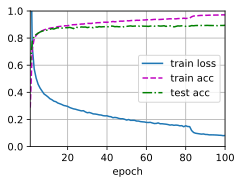

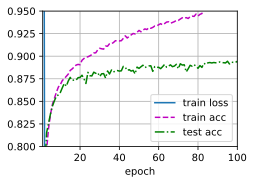

In [ ]:
num_epochs = 100

train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)